In [1]:
!nvidia-smi

Fri Jun 12 10:34:34 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      6%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import tensorflow as tf
tf.test.is_gpu_available()

True

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [4]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
X, Y = make_moons(noise=0.2, random_state=0, n_samples=1000)
X = scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)

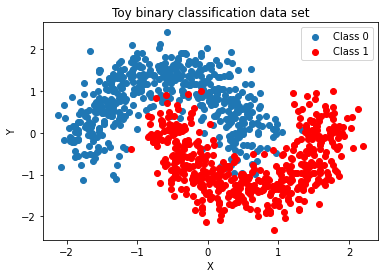

In [5]:
fig, ax = plt.subplots()
ax.scatter(X[Y==0, 0], X[Y==0, 1], label='Class 0')
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='Class 1')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Toy binary classification data set');

In [6]:
X.ndim, Y.ndim

(2, 1)

In [7]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

#Create sequential  multi-layer perceptron
#uncomment if you want to add more layers (in the interest of time we use a shallower model)
model = Sequential()
model.add(Dense(32, input_dim=2, activation='relu')) #X,Y input dimensions. connecting to 32 neurons with relu activation
model.add(Dense(1, activation='sigmoid')) #binary classification so one output

model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
?model.compile

In [9]:
seqModel = model.fit(X_train, Y_train, batch_size=32, epochs=200,
          verbose=1, validation_data=(X_test, Y_test), callbacks=[callback])
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 700 samples, validate on 300 samples
Epoch 1/200
700/700 [==============================] - 1s 2ms/step - loss: 0.7786 - accuracy: 0.2643 - val_loss: 0.7102 - val_accuracy: 0.4067
Epoch 2/200
700/700 [==============================] - 0s 108us/step - loss: 0.6747 - accuracy: 0.5143 - val_loss: 0.6211 - val_accuracy: 0.6900
Epoch 3/200
700/700 [==============================] - 0s 99us/step - loss: 0.5912 - accuracy: 0.7400 - val_loss: 0.5526 - val_accuracy: 0.7900
Epoch 4/200
700/700 [==============================] - 0s 99us/step - loss: 0.5276 - accuracy: 0.8100 - val_loss: 0.4969 - val_accuracy: 0.8333
Epoch 5/200
700/700 [==============================] - 0s 99us/step - loss: 0.4768 - accuracy: 0.8357 - val_loss: 0.4523 - val_accuracy: 0.8500
Epoch 6/200
700/700 [==============================] - 0s 96us/step - loss: 0.4361 - accuracy: 0.8543 - val_loss: 0.4169 - val_accuracy: 0.8533
Epoch 7/200
700/700 [==============================] - 0s 98us/step - loss: 0.4044 - accur

700/700 [==============================] - 0s 99us/step - loss: 0.2254 - accuracy: 0.9000 - val_loss: 0.2046 - val_accuracy: 0.9033
Epoch 58/200
700/700 [==============================] - 0s 100us/step - loss: 0.2236 - accuracy: 0.9043 - val_loss: 0.2026 - val_accuracy: 0.9133
Epoch 59/200
700/700 [==============================] - 0s 100us/step - loss: 0.2216 - accuracy: 0.9029 - val_loss: 0.2003 - val_accuracy: 0.9100
Epoch 60/200
700/700 [==============================] - 0s 106us/step - loss: 0.2195 - accuracy: 0.9029 - val_loss: 0.1982 - val_accuracy: 0.9233
Epoch 61/200
700/700 [==============================] - 0s 98us/step - loss: 0.2174 - accuracy: 0.9071 - val_loss: 0.1961 - val_accuracy: 0.9233
Epoch 62/200
700/700 [==============================] - 0s 100us/step - loss: 0.2154 - accuracy: 0.9100 - val_loss: 0.1938 - val_accuracy: 0.9233
Epoch 63/200
700/700 [==============================] - 0s 102us/step - loss: 0.2134 - accuracy: 0.9114 - val_loss: 0.1917 - val_accuracy: 

700/700 [==============================] - 0s 161us/step - loss: 0.1383 - accuracy: 0.9486 - val_loss: 0.1154 - val_accuracy: 0.9800
Epoch 114/200
700/700 [==============================] - 0s 186us/step - loss: 0.1374 - accuracy: 0.9500 - val_loss: 0.1147 - val_accuracy: 0.9800
Epoch 115/200
700/700 [==============================] - 0s 156us/step - loss: 0.1364 - accuracy: 0.9500 - val_loss: 0.1138 - val_accuracy: 0.9800
Epoch 116/200
700/700 [==============================] - 0s 147us/step - loss: 0.1356 - accuracy: 0.9500 - val_loss: 0.1129 - val_accuracy: 0.9800
Epoch 117/200
700/700 [==============================] - 0s 101us/step - loss: 0.1349 - accuracy: 0.9500 - val_loss: 0.1116 - val_accuracy: 0.9800
Epoch 118/200
700/700 [==============================] - 0s 107us/step - loss: 0.1338 - accuracy: 0.9500 - val_loss: 0.1109 - val_accuracy: 0.9800
Epoch 119/200
700/700 [==============================] - 0s 101us/step - loss: 0.1329 - accuracy: 0.9514 - val_loss: 0.1102 - val_ac

Epoch 169/200
700/700 [==============================] - 0s 112us/step - loss: 0.1082 - accuracy: 0.9614 - val_loss: 0.0857 - val_accuracy: 0.9767
Epoch 170/200
700/700 [==============================] - 0s 101us/step - loss: 0.1082 - accuracy: 0.9614 - val_loss: 0.0854 - val_accuracy: 0.9733
Epoch 171/200
700/700 [==============================] - 0s 107us/step - loss: 0.1079 - accuracy: 0.9600 - val_loss: 0.0851 - val_accuracy: 0.9767
Epoch 172/200
700/700 [==============================] - 0s 105us/step - loss: 0.1074 - accuracy: 0.9600 - val_loss: 0.0845 - val_accuracy: 0.9767
Epoch 173/200
700/700 [==============================] - 0s 101us/step - loss: 0.1073 - accuracy: 0.9600 - val_loss: 0.0848 - val_accuracy: 0.9733
Epoch 174/200
700/700 [==============================] - 0s 108us/step - loss: 0.1071 - accuracy: 0.9600 - val_loss: 0.0845 - val_accuracy: 0.9767
Epoch 175/200
700/700 [==============================] - 0s 104us/step - loss: 0.1068 - accuracy: 0.9614 - val_loss: 0

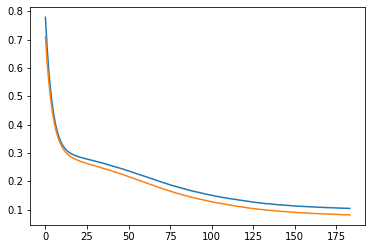

In [10]:
# visualizing losses and accuracy
train_loss = seqModel.history['loss']
val_loss   = seqModel.history['val_loss']
xc         = range(len(train_loss))

plt.figure()
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.show()

In [11]:
grid = np.mgrid[-3:3:100j,-3:3:100j]
grid_2d = grid.reshape(2, -1).T
X, Y = grid
prediction_probs = model.predict_proba(grid_2d, batch_size=32, verbose=0)

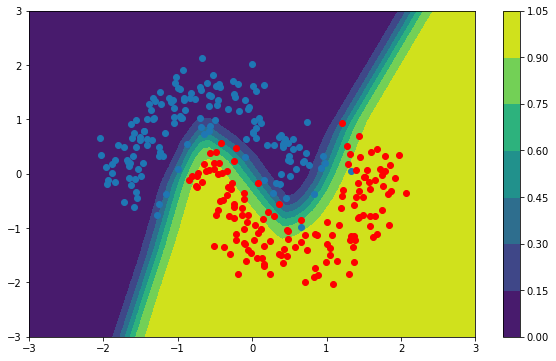

In [12]:
##plot results
fig, ax = plt.subplots(figsize=(10, 6))
contour = ax.contourf(X, Y, prediction_probs.reshape(100, 100))
ax.scatter(X_test[Y_test==0, 0], X_test[Y_test==0, 1])
ax.scatter(X_test[Y_test==1, 0], X_test[Y_test==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)

### Digit Recognizer

In [13]:
!head ../input/digit-recognizer/train.csv

In [14]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout

import pandas as pd
import numpy as np

# Read data
train = pd.read_csv('../input/digit-recognizer/train.csv')
labels = train.iloc[:,0].values.astype('int32')
X_train = (train.iloc[:,1:].values).astype('float32')
X_test = (pd.read_csv('../input/digit-recognizer/test.csv').values).astype('float32')

# convert list of labels to binary class matrix
y_train = np_utils.to_categorical(labels) 
# for the digit 1, the above will be [ 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

# pre-processing: divide by max and substract mean
scale = np.max(X_train)
X_train /= scale
X_test /= scale

mean = np.std(X_train)
X_train -= mean
X_test -= mean

input_dim = X_train.shape[1]
nb_classes = y_train.shape[1]

# Here's a Deep Dumb MLP (DDMLP)
model = Sequential()
model.add(Dense(128, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# we'll use categorical xent for the loss, and RMSprop as the optimizer
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

print("Training...")
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.3, verbose=2)

print("Generating test predictions...")
preds = model.predict_classes(X_test, verbose=0)

def write_preds(preds, fname):
    pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": preds}).to_csv(fname, index=False, header=True)

write_preds(preds, "keras-mlp.csv")
print("Done!")

Training...
Train on 29399 samples, validate on 12601 samples
Epoch 1/10
 - 6s - loss: 0.4069 - val_loss: 0.2129
Epoch 2/10
 - 6s - loss: 0.2332 - val_loss: 0.2010
Epoch 3/10
 - 6s - loss: 0.2046 - val_loss: 0.1680
Epoch 4/10
 - 6s - loss: 0.1862 - val_loss: 0.2150
Epoch 5/10
 - 6s - loss: 0.1750 - val_loss: 0.1700
Epoch 6/10
 - 6s - loss: 0.1776 - val_loss: 0.1435
Epoch 7/10
 - 6s - loss: 0.1778 - val_loss: 0.1671
Epoch 8/10
 - 6s - loss: 0.1650 - val_loss: 0.1729
Epoch 9/10
 - 7s - loss: 0.1710 - val_loss: 0.1766
Epoch 10/10
 - 7s - loss: 0.1693 - val_loss: 0.1786
Generating test predictions...
Done!


In [ ]:
!head keras-mlp.csv